In [2]:
import random
import math
import cmath
import numpy as np
import sympy as sp
from sympy.vector import Del
from sympy import I as J
import scipy.stats as stats
from scipy.special import perm, comb, factorial
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import control as ct
sp.init_printing()

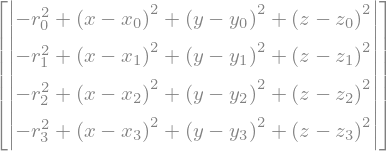

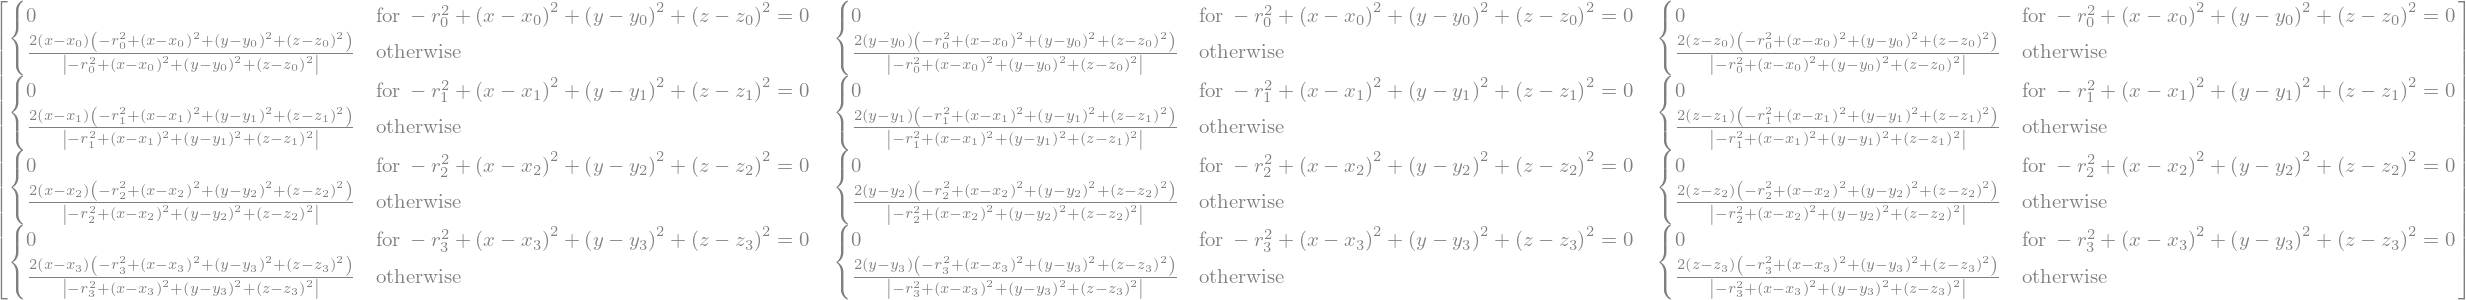

In [8]:
# multilateration via gauss-newton weighted least squares estimation

x, y, z = sp.symbols('x y z', real=True)

x0, y0, z0, r0 = sp.symbols('x_0 y_0 z_0 r_0', real=True)
x1, y1, z1, r1 = sp.symbols('x_1 y_1 z_1 r_1', real=True)
x2, y2, z2, r2 = sp.symbols('x_2 y_2 z_2 r_2', real=True)
x3, y3, z3, r3 = sp.symbols('x_3 y_3 z_3 r_3', real=True)


# residual function, minimizing the error between the squared distance and the estimated squared distance
r = sp.Matrix([
    [ sp.Abs( ( (x0 - x)**2 + (y0 - y)**2 + (z0 - z)**2 ) - r0**2 ) ],
    [ sp.Abs( ( (x1 - x)**2 + (y1 - y)**2 + (z1 - z)**2 ) - r1**2 ) ],
    [ sp.Abs( ( (x2 - x)**2 + (y2 - y)**2 + (z2 - z)**2 ) - r2**2 ) ],
    [ sp.Abs( ( (x3 - x)**2 + (y3 - y)**2 + (z3 - z)**2 ) - r3**2 ) ]
])

r = sp.simplify(r)

# jacobian of the residual function
J = r.jacobian([x, y, z])
J = sp.simplify(J)

display(r)
display(J)

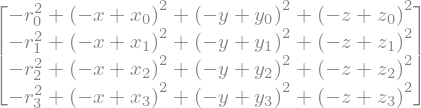

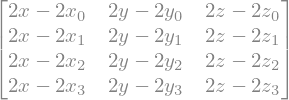

In [10]:
# Without the absolute value, it's not that bad. The big term to the right is basically just the sign of the error
#
# So, if the error is positive, do nothing. If the error is negative, multiply by -1.

r = sp.Matrix([
    [ ( (x0 - x)**2 + (y0 - y)**2 + (z0 - z)**2 ) - r0**2 ],
    [ ( (x1 - x)**2 + (y1 - y)**2 + (z1 - z)**2 ) - r1**2 ],
    [ ( (x2 - x)**2 + (y2 - y)**2 + (z2 - z)**2 ) - r2**2 ],
    [ ( (x3 - x)**2 + (y3 - y)**2 + (z3 - z)**2 ) - r3**2 ]
])

J = r.jacobian([x, y, z])
J = sp.simplify(J)

display(r)
display(J)

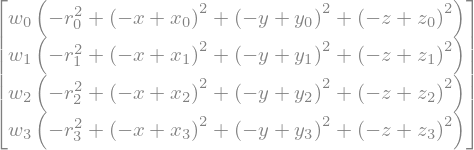

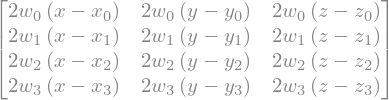

In [11]:
# With weights

w0, w1, w2, w3 = sp.symbols('w_0 w_1 w_2 w_3')

r = sp.Matrix([
    [ ( ( (x0 - x)**2 + (y0 - y)**2 + (z0 - z)**2 ) - r0**2 )*sp.sqrt(w0) ],
    [ ( ( (x1 - x)**2 + (y1 - y)**2 + (z1 - z)**2 ) - r1**2 )*sp.sqrt(w1) ],
    [ ( ( (x2 - x)**2 + (y2 - y)**2 + (z2 - z)**2 ) - r2**2 )*sp.sqrt(w2) ],
    [ ( ( (x3 - x)**2 + (y3 - y)**2 + (z3 - z)**2 ) - r3**2 )*sp.sqrt(w3) ]
])

J = r.jacobian([x, y, z])
J = sp.simplify(J)

display(r)
display(J)